## Standard Imports

In [7]:
import sys
import os

sys.path.append(os.path.join(os.getcwd(), "..", "."))  # add parent dir to path

import numpy as np
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
import matplotlib.pyplot as plt

# Use STIX font for math plotting
plt.rcParams["font.family"] = "STIXGeneral"

import torchvision
from torchvision import transforms
from termcolor import colored

DATASET_PATH = "../data"
CHECKPOINT_PATH = "../saved_models/tutorial15"

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(colored(f"Using device:", "green"), device)

Using device: cuda:0


## Dataset Preparation

In [2]:
if not os.path.exists(DATASET_PATH):
    os.makedirs(DATASET_PATH)
    download = True
else:
    download = False

# Vision-transformers are data hungry, we add some data augmentation
train_dataset = torchvision.datasets.CIFAR10(
    root=DATASET_PATH,
    train=True,
    transform=transforms.Compose(
        [
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ]
    ),
    download=download,
)
test_dataset = torchvision.datasets.CIFAR10(
    root=DATASET_PATH,
    train=False,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
        ]
    ),
    download=download,
)

# Define the dataloaders
train_loader = data.DataLoader(
    train_dataset,
    batch_size=128,
    shuffle=True,
    num_workers=4,
    pin_memory=True,
    drop_last=True,
)
test_loader = data.DataLoader(
    test_dataset, batch_size=128, shuffle=False, num_workers=4, drop_last=False
)

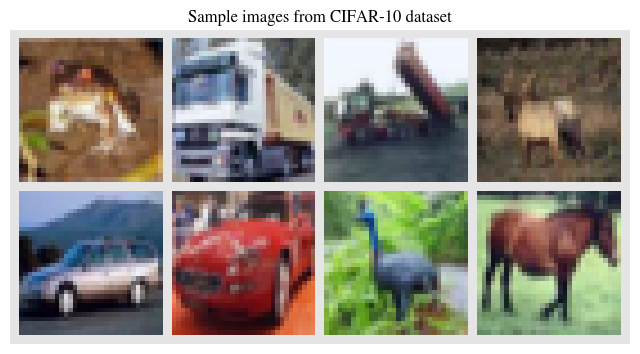

In [6]:
# Visualize eight random images from the training dataset
samples = torch.stack([train_dataset[idx][0] for idx in range(8)], dim=0)
img_grid = torchvision.utils.make_grid(samples, nrow=4, normalize=True, pad_value=0.9)
img_grid = img_grid.permute(1, 2, 0)

plt.figure(figsize=(8, 8))
plt.title("Sample images from CIFAR-10 dataset")
plt.imshow(img_grid)
plt.axis("off")
plt.show()